In [2]:
%config IPCompleter.greedy=True
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import time

sns.set()


plt.rcParams["figure.figsize"] = (30,20)

df = pd.read_csv(r'C:\Users\Niall\Downloads\owid-covid-data.csv', index_col=0, parse_dates=['date'])

df.head()
south_america = df.loc[df['location'] == 'South America']
true_peru = df.loc[df['location'] == 'Peru']
peru = df.loc[df['location'] == 'Peru'] #Getting Perus Data TODO: change this to a function so all countries can be accessed
brazil = df.loc[df['location'] == 'Brazil']
ecuador = df.loc[df['location'] == 'Ecuador']
bolivia = df.loc[df['location'] == 'Bolivia']
chile = df.loc[df['location'] == 'Chile']
colombia = df.loc[df['location'] == 'Colombia']
world = df.loc[df['location'] == 'World']

def end_date_finder_and_change_date_to_date_true_peru(a): #Change date values to dates and find the 03/01/21
    enddate = datetime(2021, 3, 1)
    for i in range(len(a.axes[0])):
        if a.iloc[i,2] > enddate:
            end = i
            break
    a = a[:end]
    return a

def end_date_finder_and_change_date_to_date(a): #Change date values to dates and find the 03/01/21
    startdate = datetime(2020, 3 , 11)
    enddate = datetime(2021, 3, 1)
    start = 0
    for i in range(len(a.axes[0])):
        if a.iloc[i,2] > enddate:
            end = i
            break
    for i in range(len(a.axes[0])):
        if a.iloc[i,2] == startdate:
            start = i
            break
    a = a[:end]
    return a 

def change_date_to_index(a):
    a = a.set_index(a['date'])
    return a

south_america = pd.DataFrame(end_date_finder_and_change_date_to_date_true_peru(south_america))
world = pd.DataFrame(end_date_finder_and_change_date_to_date_true_peru(world))
true_peru = pd.DataFrame(end_date_finder_and_change_date_to_date_true_peru(true_peru))
ecuador = end_date_finder_and_change_date_to_date(ecuador)
brazil = end_date_finder_and_change_date_to_date(brazil)     
peru = end_date_finder_and_change_date_to_date(peru)
bolivia = end_date_finder_and_change_date_to_date(bolivia)
chile = end_date_finder_and_change_date_to_date(chile)
colombia= end_date_finder_and_change_date_to_date(colombia)

south_america = change_date_to_index(south_america)
world = change_date_to_index(world)
true_peru = change_date_to_index(true_peru)
ecuador = change_date_to_index(ecuador)
brazil = change_date_to_index(brazil)
peru = change_date_to_index(peru)
bolivia = change_date_to_index(bolivia)
chile = change_date_to_index(chile)
colombia = change_date_to_index(colombia)



peru.head()
dates = ["Feb 20", "Mar 20", "Apr 20", "May 20", "Jun 20", "Jul 20", "Aug 20", "Sep 20", "Oct 20", "Nov 20", "Dec 20",
        "Jan 21", "Feb 21", "Mar 21"] 


#sns.relplot(x='date', y='total_cases', data=peru)

#corr = peru.corr()

#sns.heatmap()

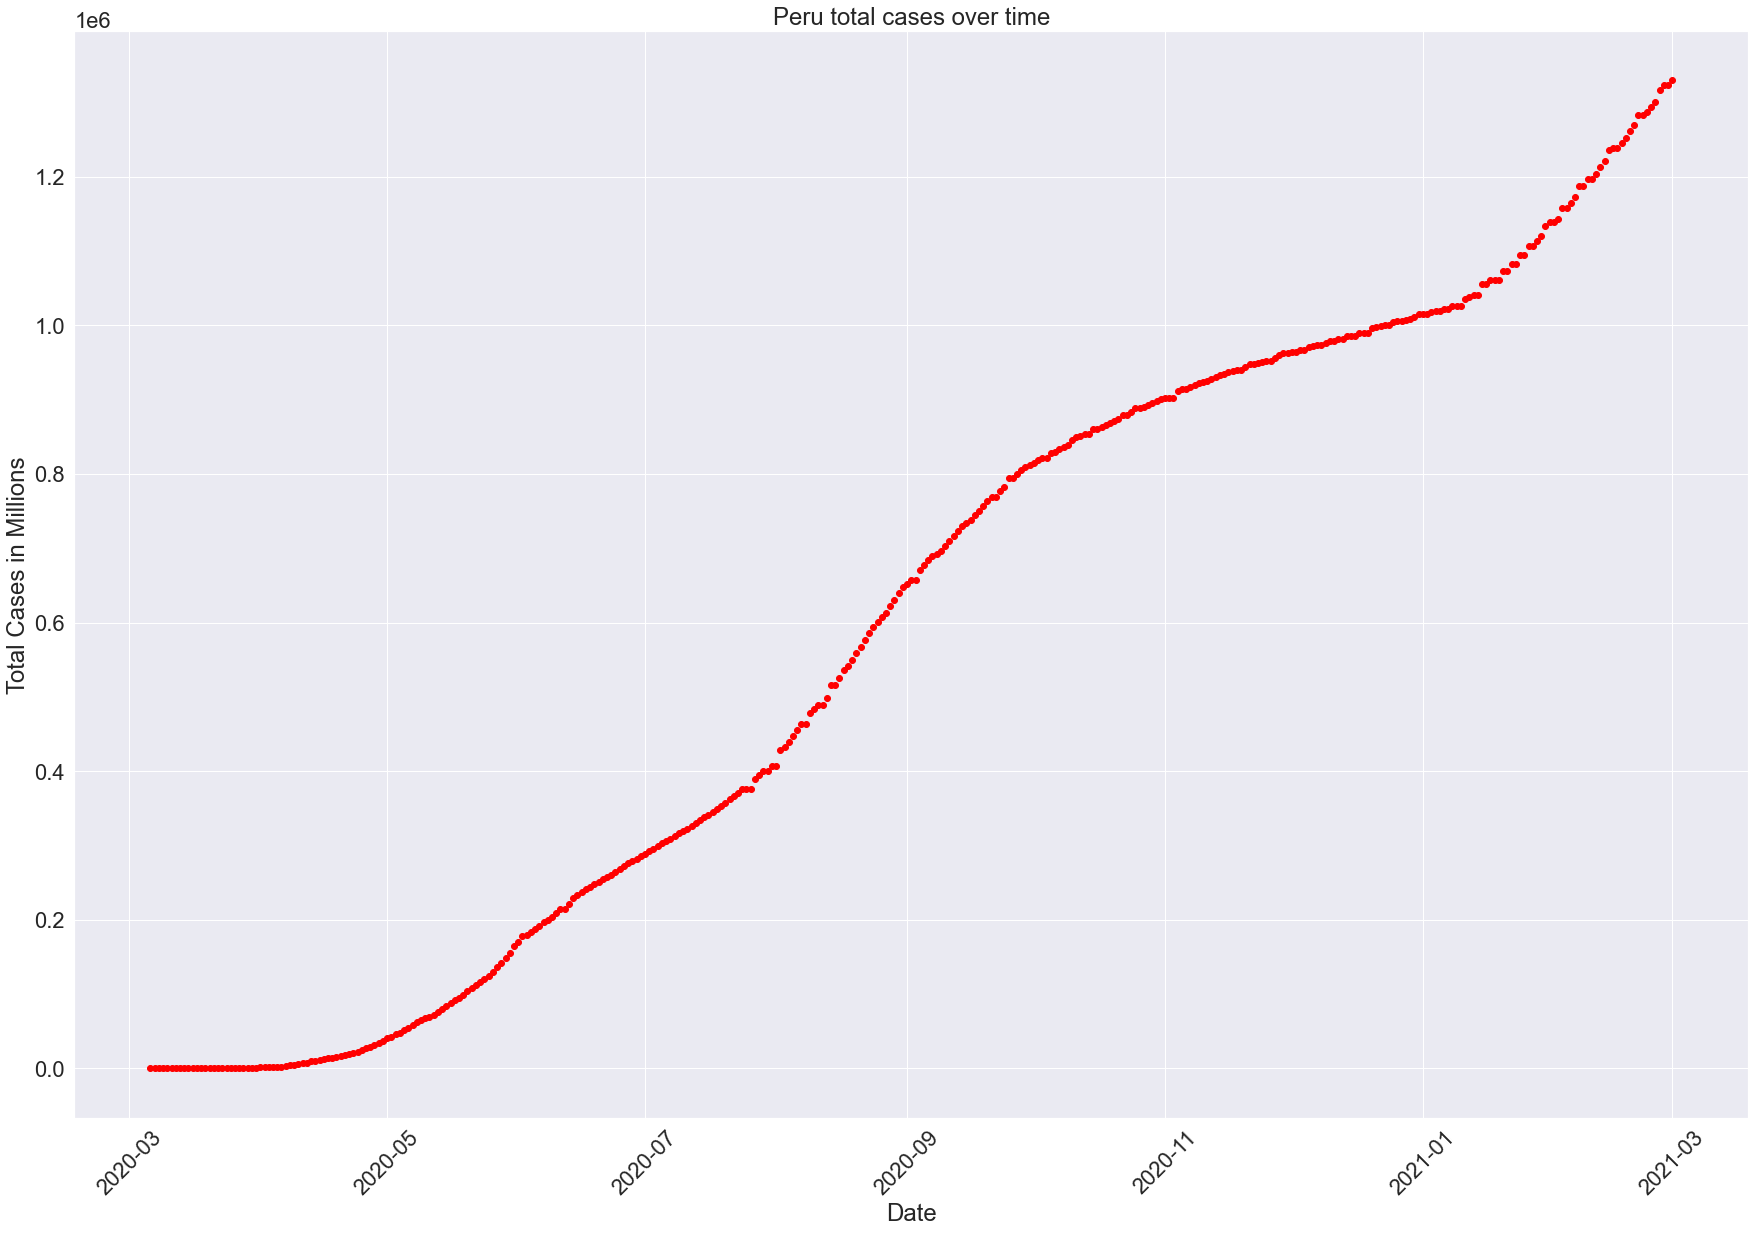

In [3]:
#Total cases over complete time

sns.set_style('darkgrid')
sns.set(font_scale=2)
fig, g = plt.subplots(figsize=(30, 20))

g.scatter(peru.index.values, peru['total_cases'], color='red')
#g.scatter(bolivia.index.values, bolivia['total_cases'], color='green')
g.set(xlabel='Date', ylabel='Total Cases in Millions', title = 'Peru total cases over time')
plt.setp(g.get_xticklabels(), rotation=45)

plt.show()


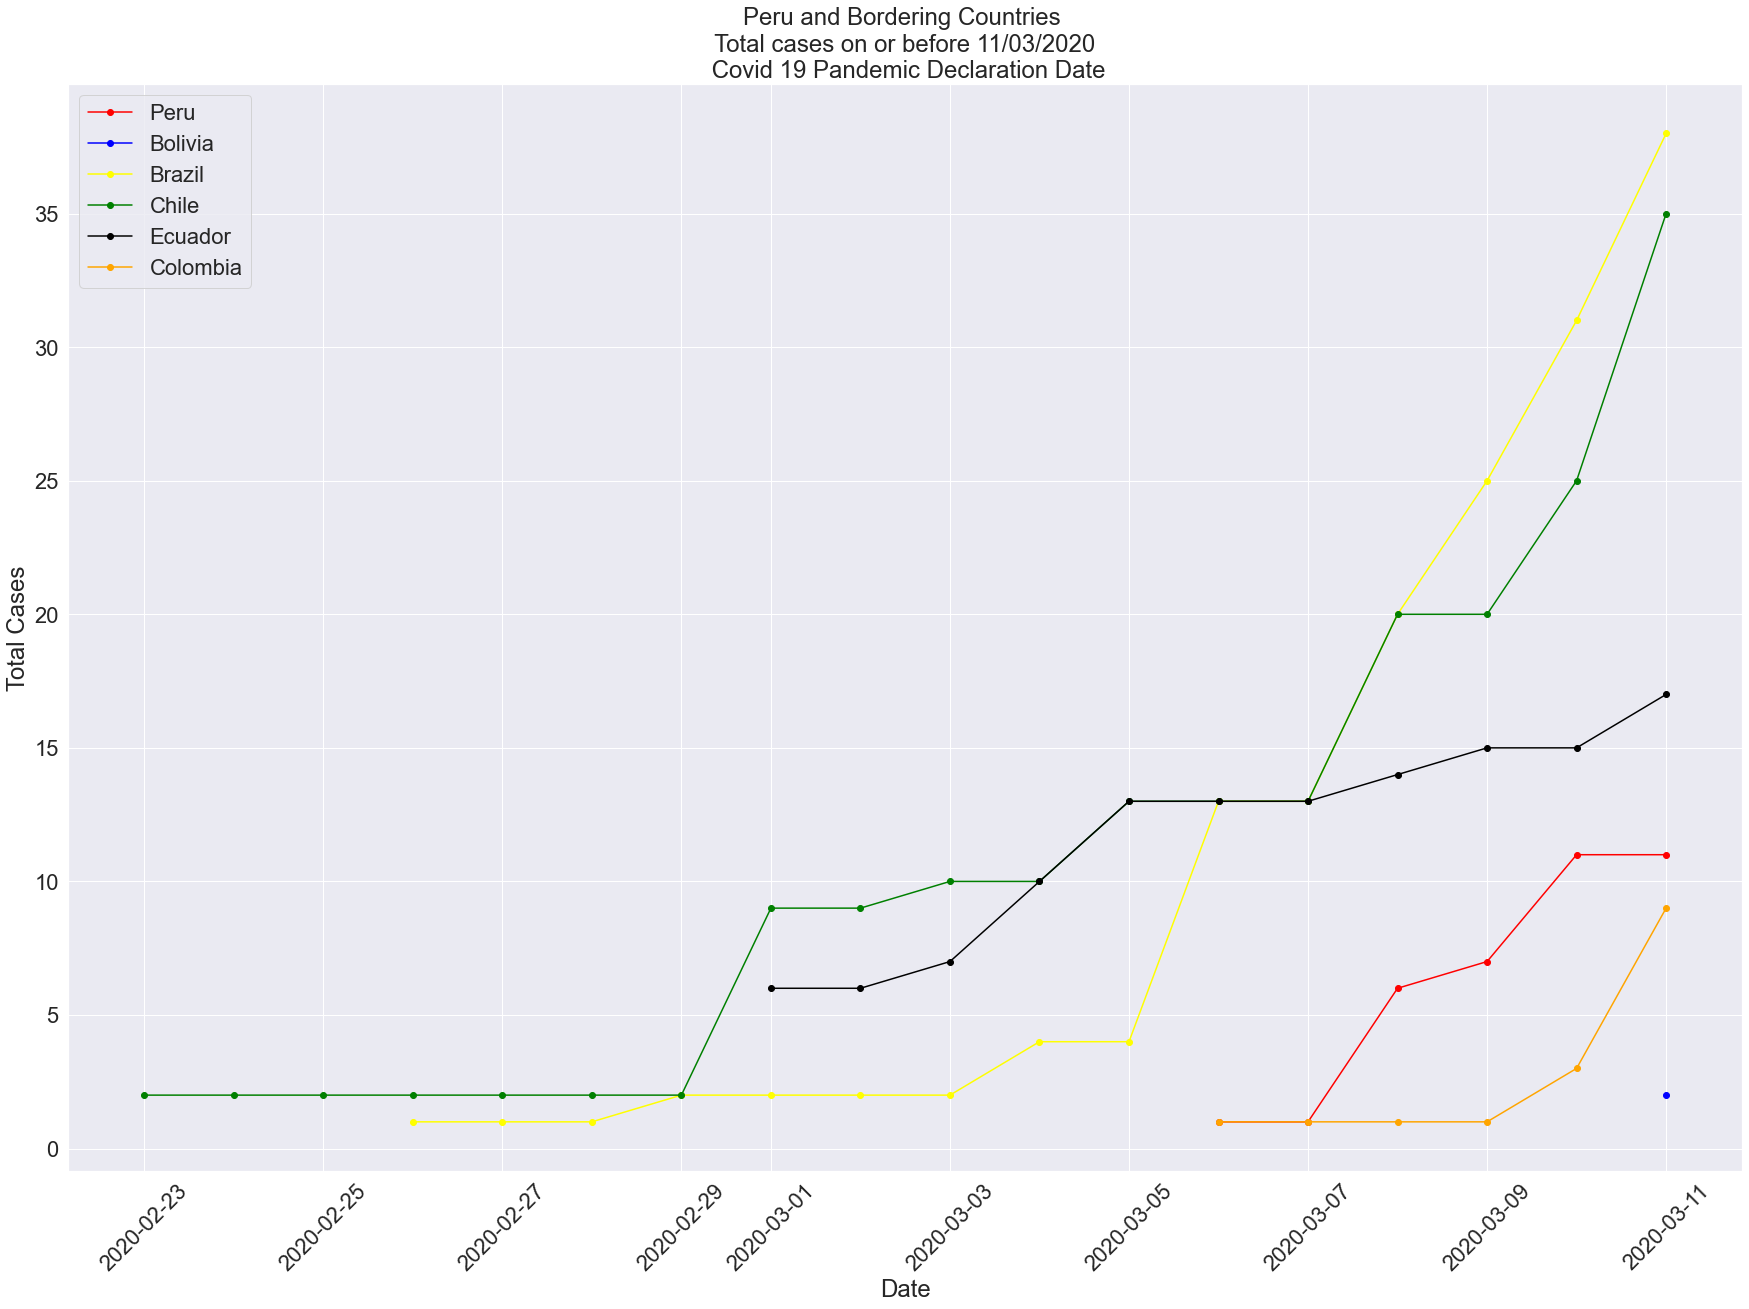

In [4]:
#Peru vs the world vs South America Pandemic Declaration 11/03/20
d110320 = datetime(2020, 3, 11)
peru110320 = true_peru.loc[true_peru['date'] <= d110320]
world110320 = world.loc[world['date'] <= d110320]
south_america_110320 = south_america.loc[south_america['date'] <= d110320]

bol110320 = bolivia.loc[bolivia['date'] <= d110320]
bra110320= brazil.loc[brazil['date'] <= d110320]
chil110320 = chile.loc[chile['date'] <= d110320]
ecu110320 = ecuador.loc[ecuador['date'] <= d110320]
col110320 = colombia.loc[colombia['date'] <= d110320]

peru110320.tail()

sns.set_style('darkgrid')
sns.set(font_scale=2)
fig, g = plt.subplots(figsize=(30, 20))

g.plot(peru110320.index.values, peru110320['total_cases'], color='red', label = 'Peru', marker = "o")
g.plot(bol110320.index.values, bol110320['total_cases'], color='blue', label = 'Bolivia', marker = "o")
g.plot(bra110320.index.values, bra110320['total_cases'], color='yellow', label = 'Brazil', marker = "o")
g.plot(chil110320.index.values, chil110320['total_cases'], color='green', label = 'Chile', marker = "o")
g.plot(ecu110320.index.values, ecu110320['total_cases'], color='black', label = 'Ecuador', marker = "o")
g.plot(col110320.index.values, col110320['total_cases'], color='orange', label = 'Colombia', marker = "o")

g.legend()

#g.plot(world110320.index.values, world110320['total_cases'], color='green')
#g.plot(south_america_110320.index.values, south_america_110320['total_cases'], color='blue')
g.set(xlabel='Date', ylabel='Total Cases', title = 'Peru and Bordering Countries \n Total cases on or before 11/03/2020 \n Covid 19 Pandemic Declaration Date')
plt.setp(g.get_xticklabels(), rotation=45)

plt.show()



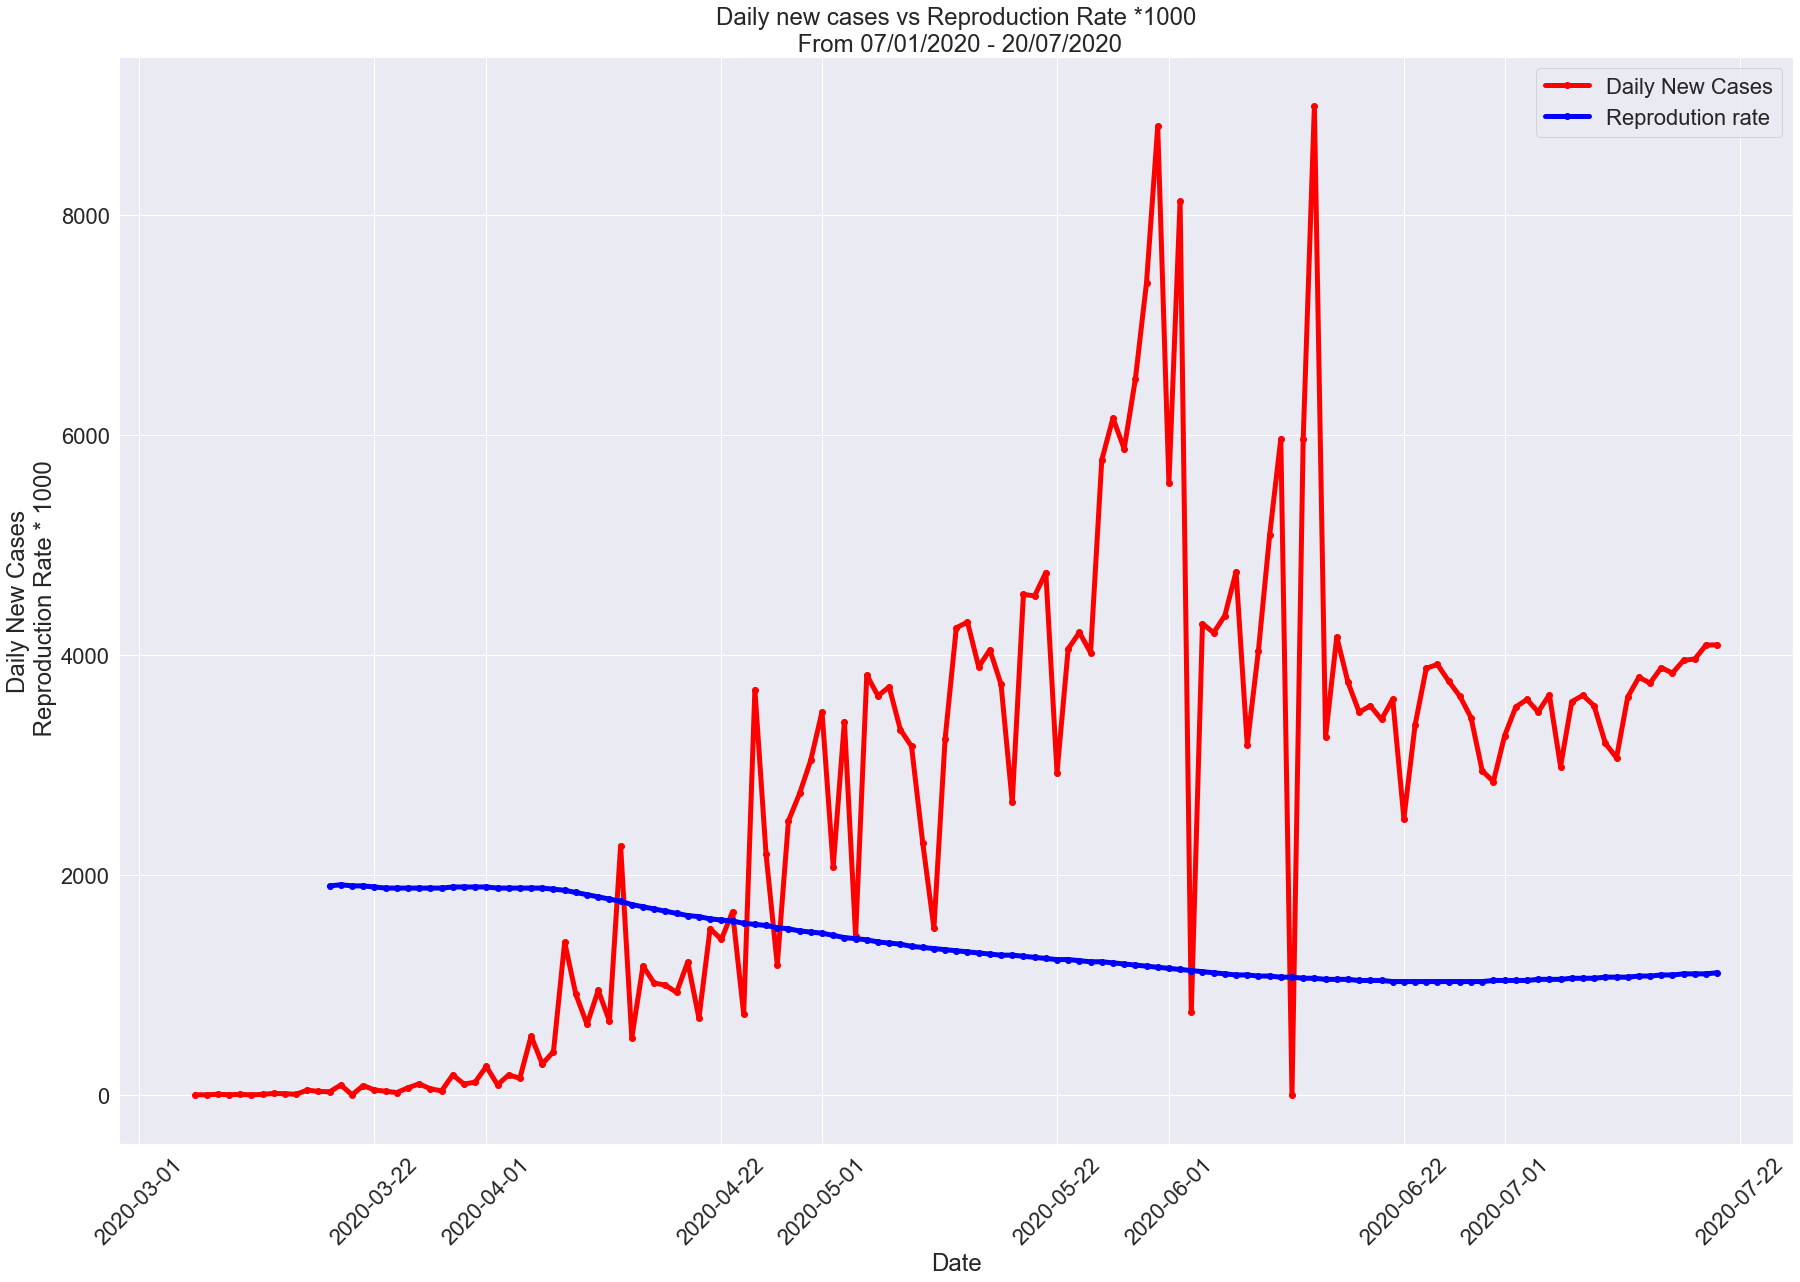

In [5]:
#Violin plot including R Rate

f, ax = plt.subplots(figsize=(30, 20))
d200620 = datetime(2020, 7, 20)
peru200620 = true_peru.loc[true_peru['date'] <= d200620]
repro_rate = [1000*a for a in peru200620['reproduction_rate']]
south_america200620 = south_america.loc[south_america['date'] <= d200620]
repro_ratesa = [100*a for a in south_america200620['reproduction_rate']]

#ax.plot(south_america200620.index.values, south_america200620['new_cases'], color='red', label = 'Daily New Cases', marker = "o", linewidth = 5)
#ax.plot(south_america200620.index.values, repro_ratesa, color='blue', label = 'Reprodution rate', marker = "o", linewidth = 5)

ax.plot(peru200620.index.values, peru200620['new_cases'], color='red', label = 'Daily New Cases', marker = "o", linewidth = 5)
ax.plot(peru200620.index.values, repro_rate, color='blue', label = 'Reprodution rate', marker = "o", linewidth = 5)
ax.set(xlabel='Date', ylabel='Daily New Cases\n Reproduction Rate * 1000', title = 'Daily new cases vs Reproduction Rate *1000\n From 07/01/2020 - 20/07/2020')

plt.setp(ax.get_xticklabels(), rotation=45)

plt.legend()


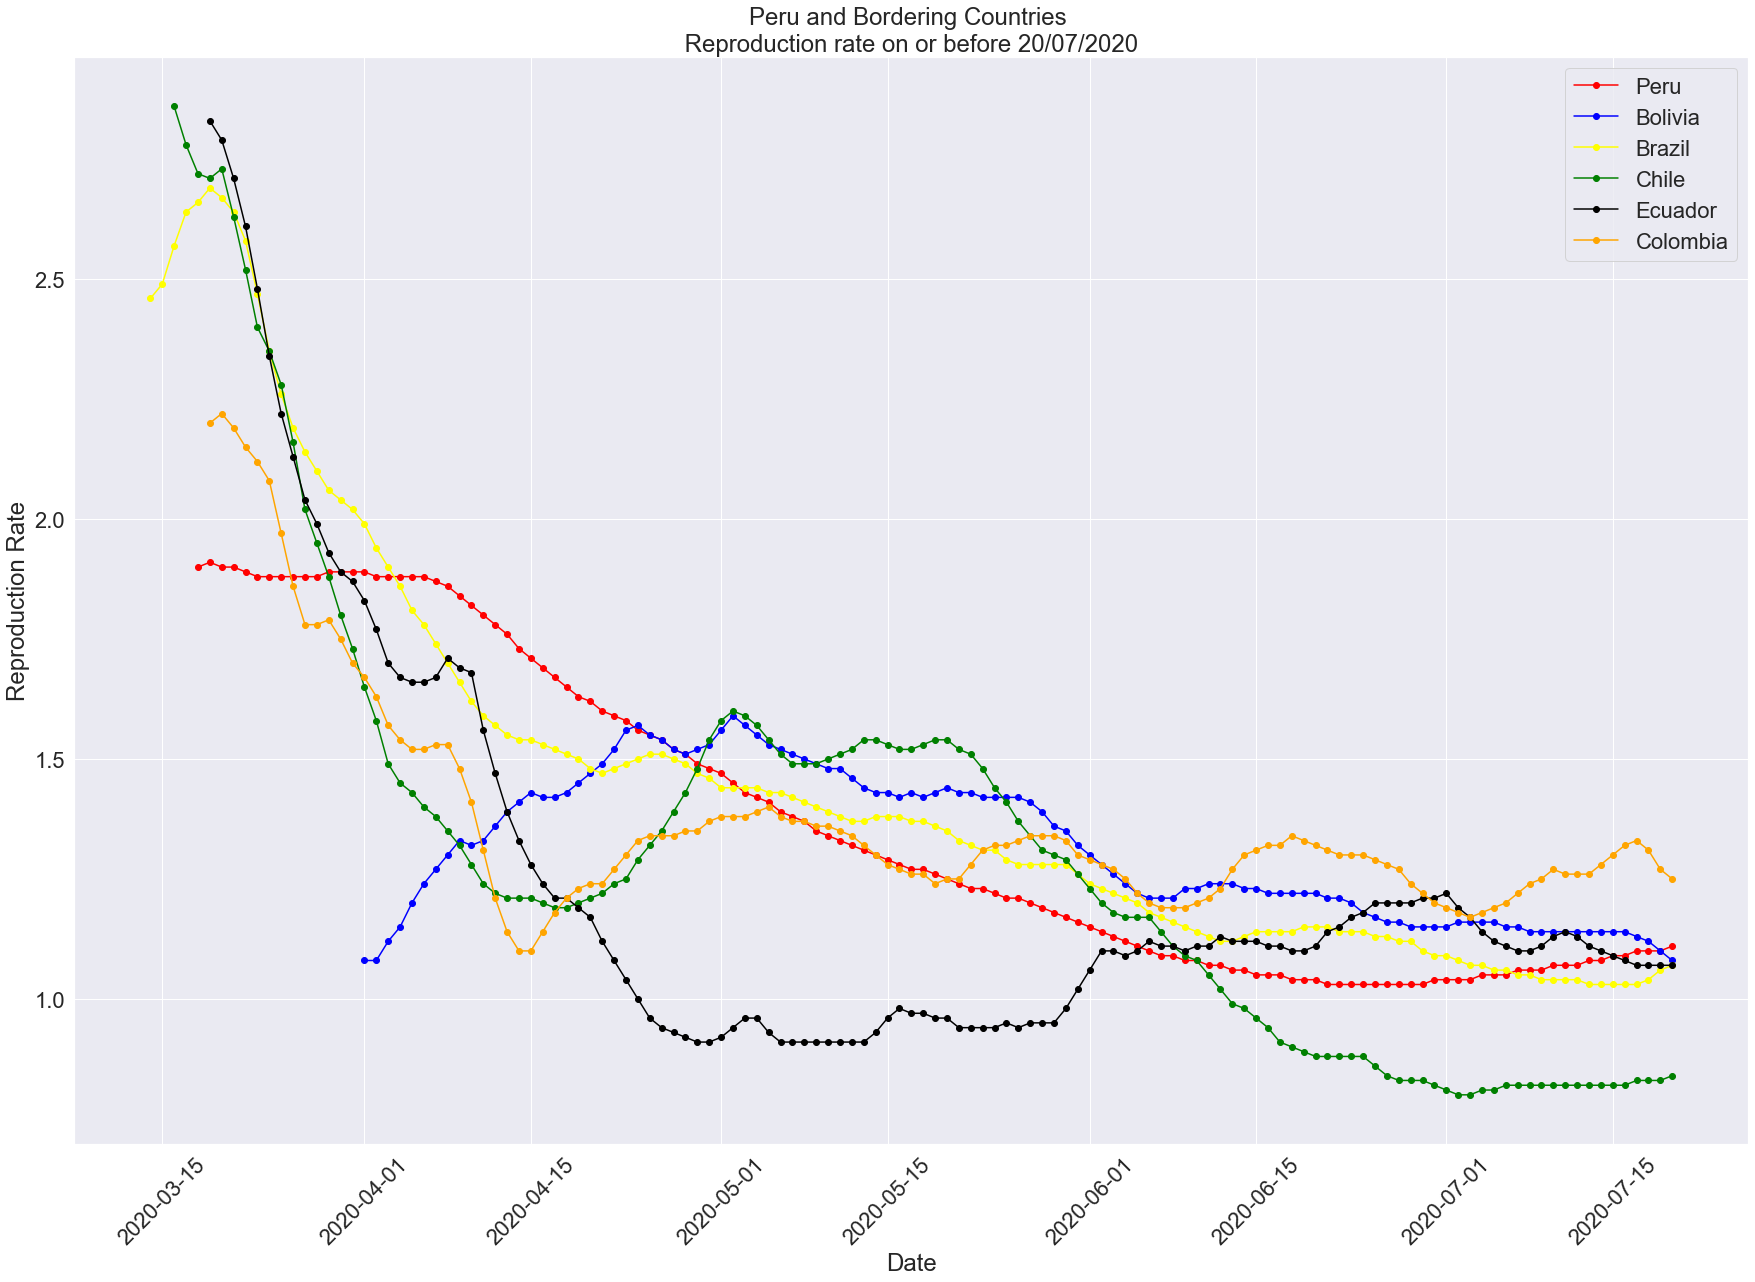

In [6]:
sns.set_style('darkgrid')
sns.set(font_scale=2)
fig, g = plt.subplots(figsize=(30, 20))

col200620 = colombia.loc[colombia['date'] <= d200620]
bol200620 = bolivia.loc[bolivia['date'] <= d200620]
bra200620 = brazil.loc[brazil['date'] <= d200620]
chil200620 = chile.loc[chile['date'] <= d200620]
ecu200620 = ecuador.loc[ecuador['date'] <= d200620]

g.plot(peru200620.index.values, peru200620['reproduction_rate'], color='red', label = 'Peru', marker = "o")
g.plot(bol200620.index.values, bol200620['reproduction_rate'], color='blue', label = 'Bolivia', marker = "o")
g.plot(bra200620.index.values, bra200620['reproduction_rate'], color='yellow', label = 'Brazil', marker = "o")
g.plot(chil200620.index.values, chil200620['reproduction_rate'], color='green', label = 'Chile', marker = "o")
g.plot(ecu200620.index.values, ecu200620['reproduction_rate'], color='black', label = 'Ecuador', marker = "o")
g.plot(col200620.index.values, col200620['reproduction_rate'], color='orange', label = 'Colombia', marker = "o")


g.legend()

g.set(xlabel='Date', ylabel='Reproduction Rate', title = 'Peru and Bordering Countries \n Reproduction rate on or before 20/07/2020 ')
plt.setp(g.get_xticklabels(), rotation=45)

plt.show()



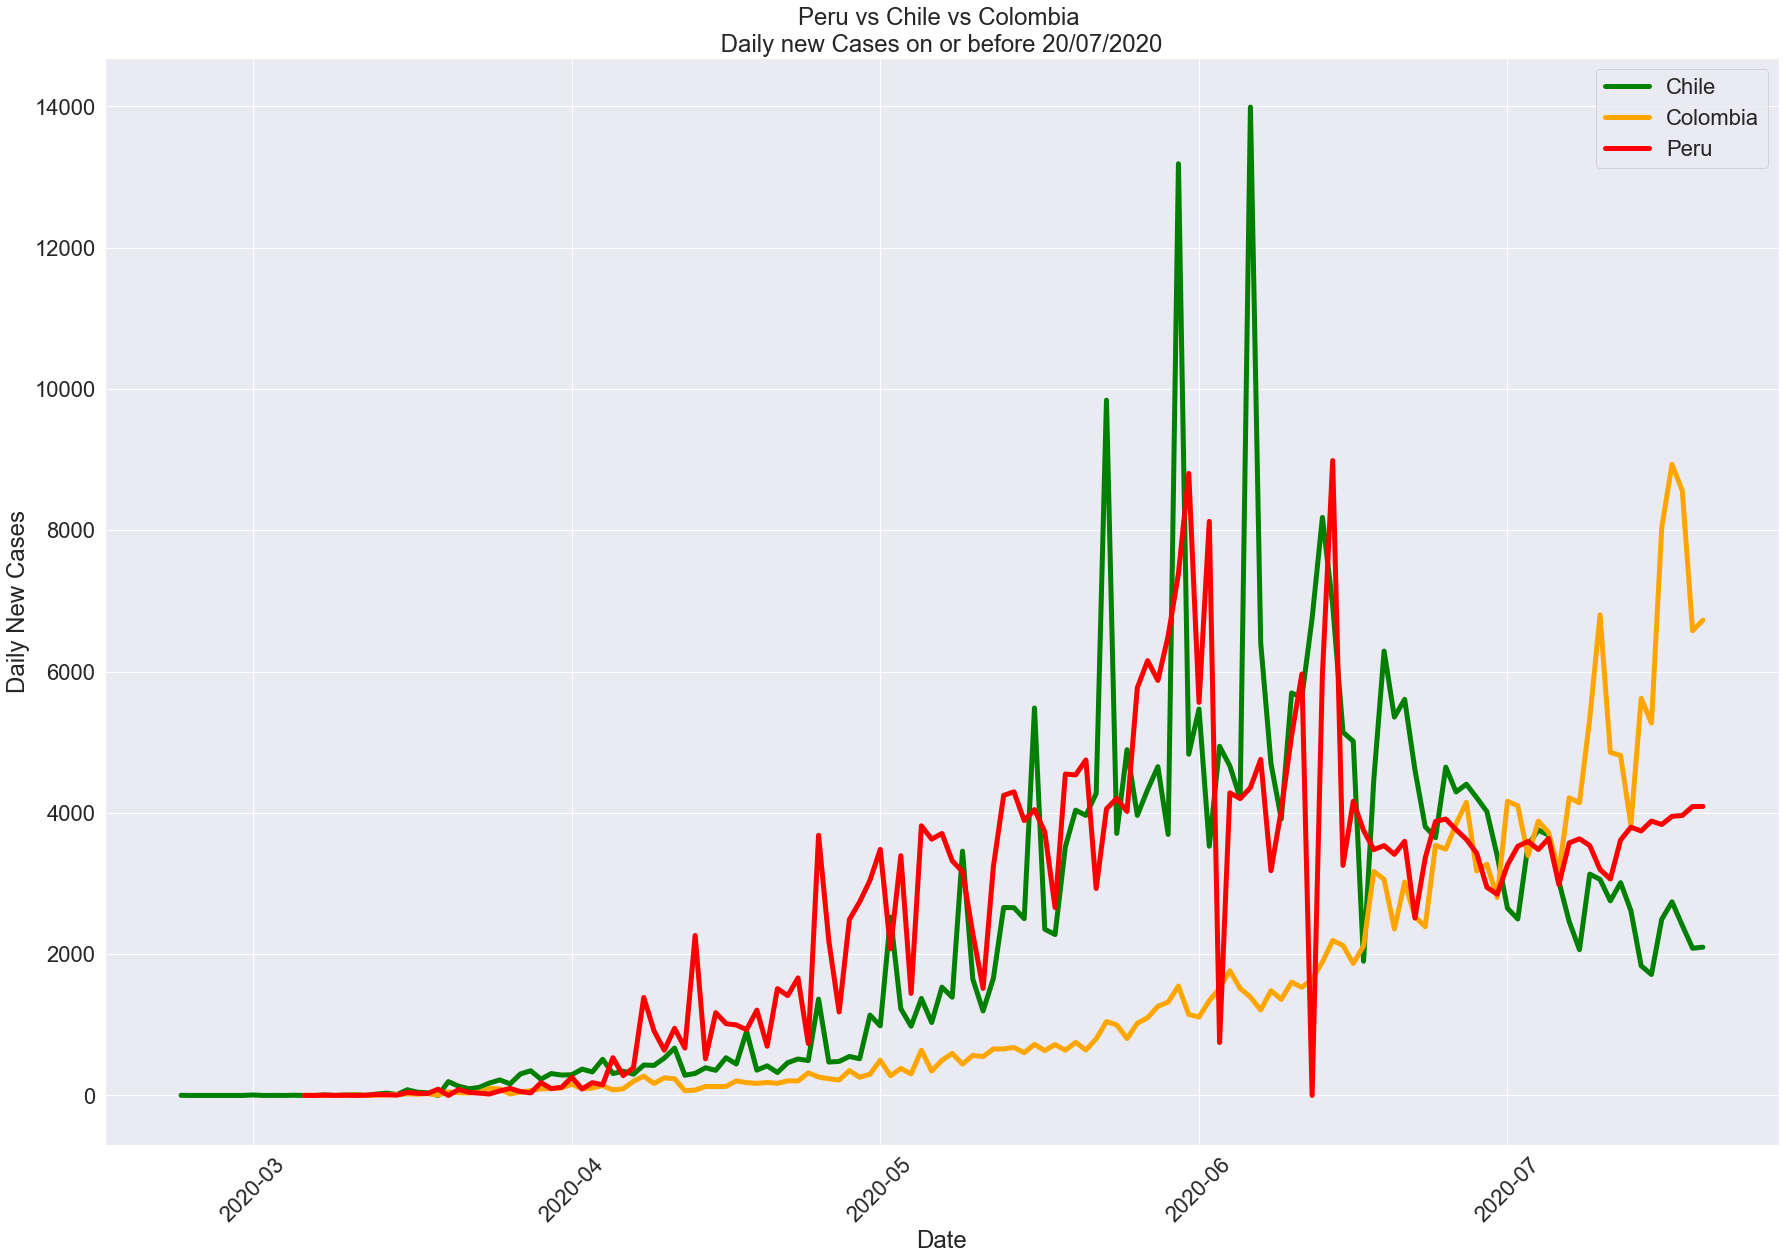

In [11]:
sns.set_style('darkgrid')
sns.set(font_scale=2)
fig, g = plt.subplots(figsize=(30, 20))

g.plot(chil200620.index.values, chil200620['new_cases'], color='green', label = 'Chile', linewidth = 5)
g.plot(col200620.index.values, col200620['new_cases'], color='orange', label = 'Colombia', linewidth = 5)
g.plot(peru200620.index.values, peru200620['new_cases'], color='red', label = 'Peru', linewidth = 5)

g.legend()

g.set(xlabel='Date', ylabel='Daily New Cases', title = 'Peru vs Chile vs Colombia \n Daily new Cases on or before 20/07/2020 ')
plt.setp(g.get_xticklabels(), rotation=45)

plt.show()




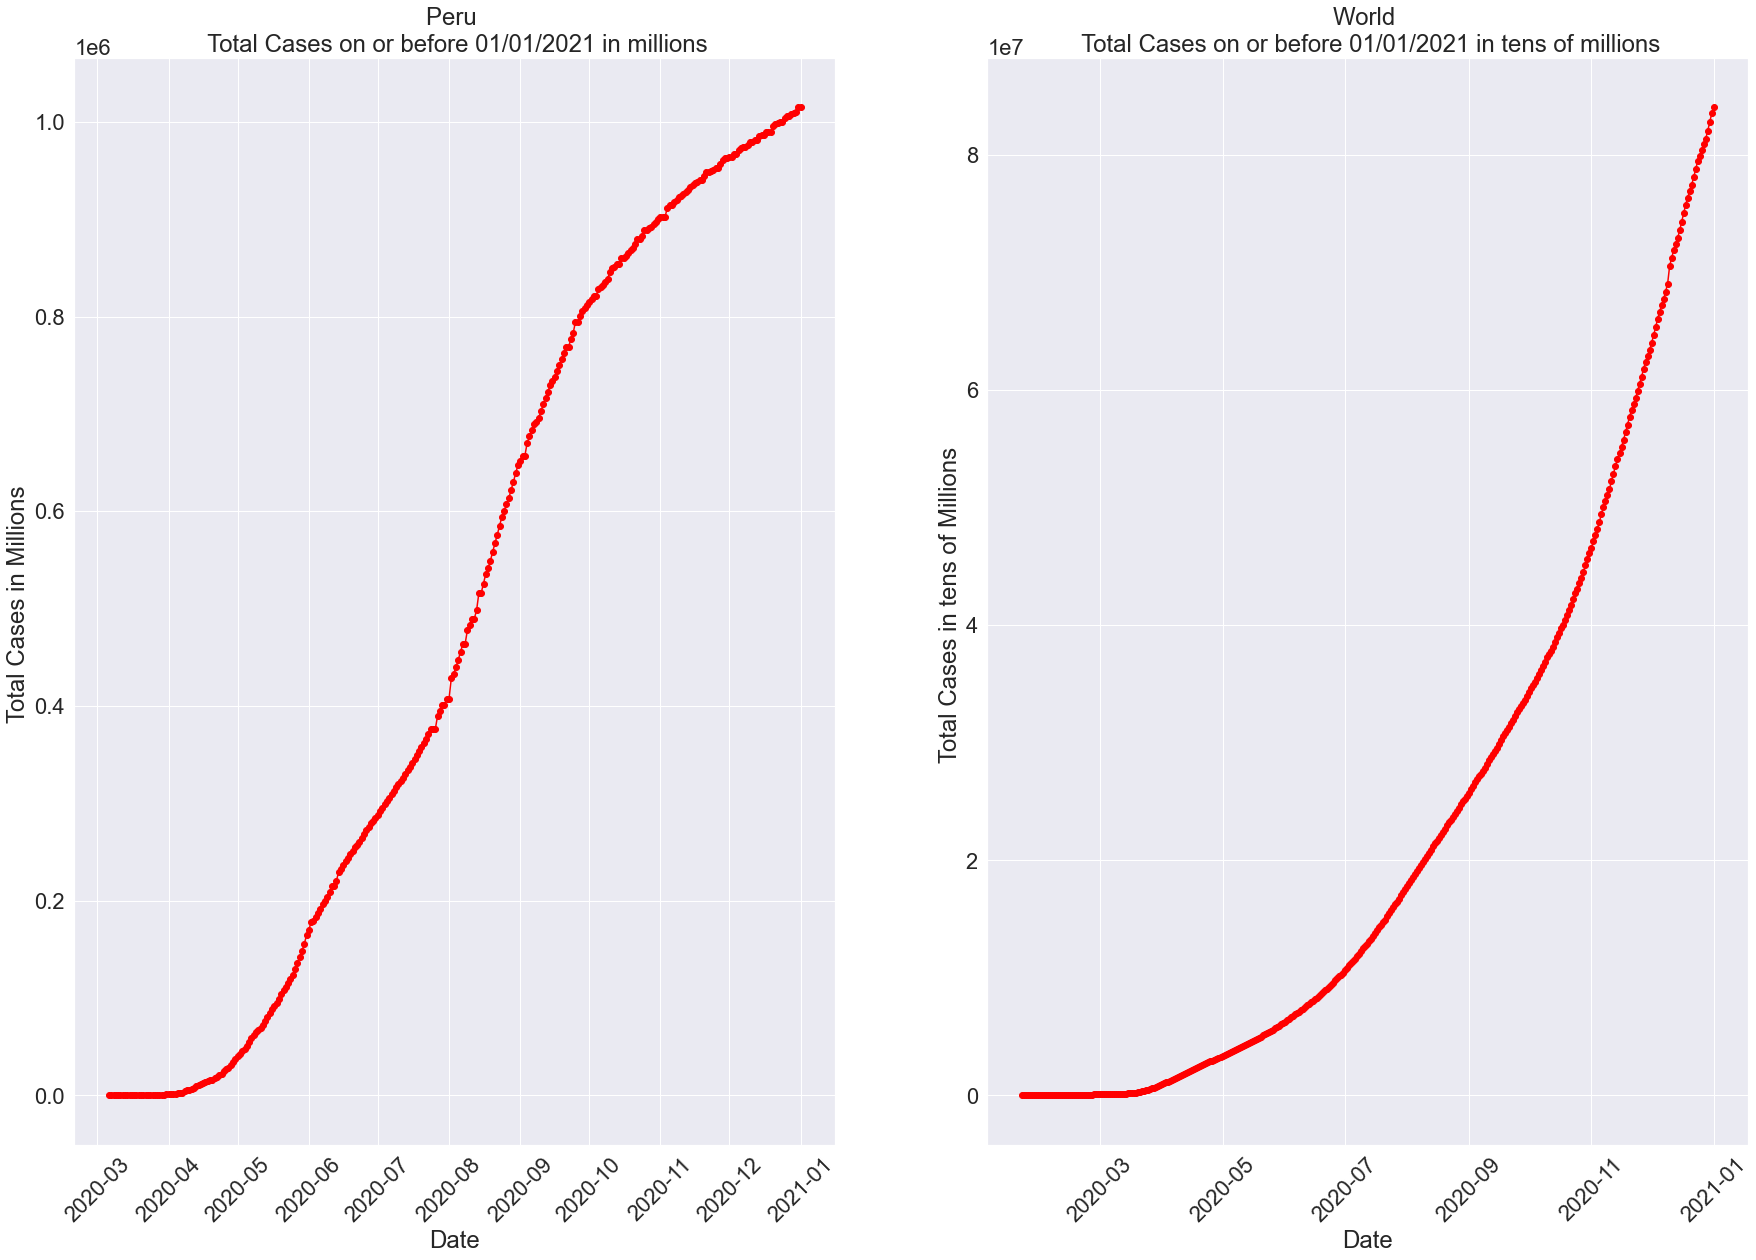

In [28]:
sns.set_style('darkgrid')
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2, figsize=(30, 20))

d2021 = datetime(2021, 1, 1)

col2021 = colombia.loc[colombia['date'] <= d2021]
bol2021 = bolivia.loc[bolivia['date'] <= d2021]
bra2021 = brazil.loc[brazil['date'] <= d2021]
chil2021 = chile.loc[chile['date'] <= d2021]
ecu2021 = ecuador.loc[ecuador['date'] <= d2021]
peru2021 = true_peru.loc[true_peru['date'] <= d2021]
world2021 = world.loc[world['date'] <= d2021]

ax[0].plot(peru2021.index.values, peru2021['total_cases'], color='red', label = 'Peru', marker = "o")
ax[1].plot(world2021.index.values, world2021['total_cases'], color='red', label = 'Peru', marker = "o")

#ax.plot(bol2021.index.values, bol2021['total_cases'], color='blue', label = 'Bolivia', marker = "o")
#ax.plot(bra2021.index.values, bra2021['total_cases'], color='yellow', label = 'Brazil', marker = "o")
#ax.plot(chil2021.index.values, chil2021['total_cases'], color='green', label = 'Chile', marker = "o")
#ax.plot(ecu2021.index.values, ecu2021['total_cases'], color='black', label = 'Ecuador', marker = "o")
#ax.plot(col2021.index.values, col2021['total_cases'], color='orange', label = 'Colombia', marker = "o")

#ax.legend()

ax[.set(xlabel='Date', ylabel='Total Cases in Millions ', title = 'Peru \n Total Cases on or before 01/01/2021 in millions')
#ax[1].set(xlabel='Date', ylabel='Total Cases in tens of Millions ', title = 'World \n Total Cases on or before 01/01/2021 in tens of millions')
plt.setp(ax[0].get_xticklabels(), rotation=45)
plt.setp(ax[1].get_xticklabels(), rotation=45)


plt.show()




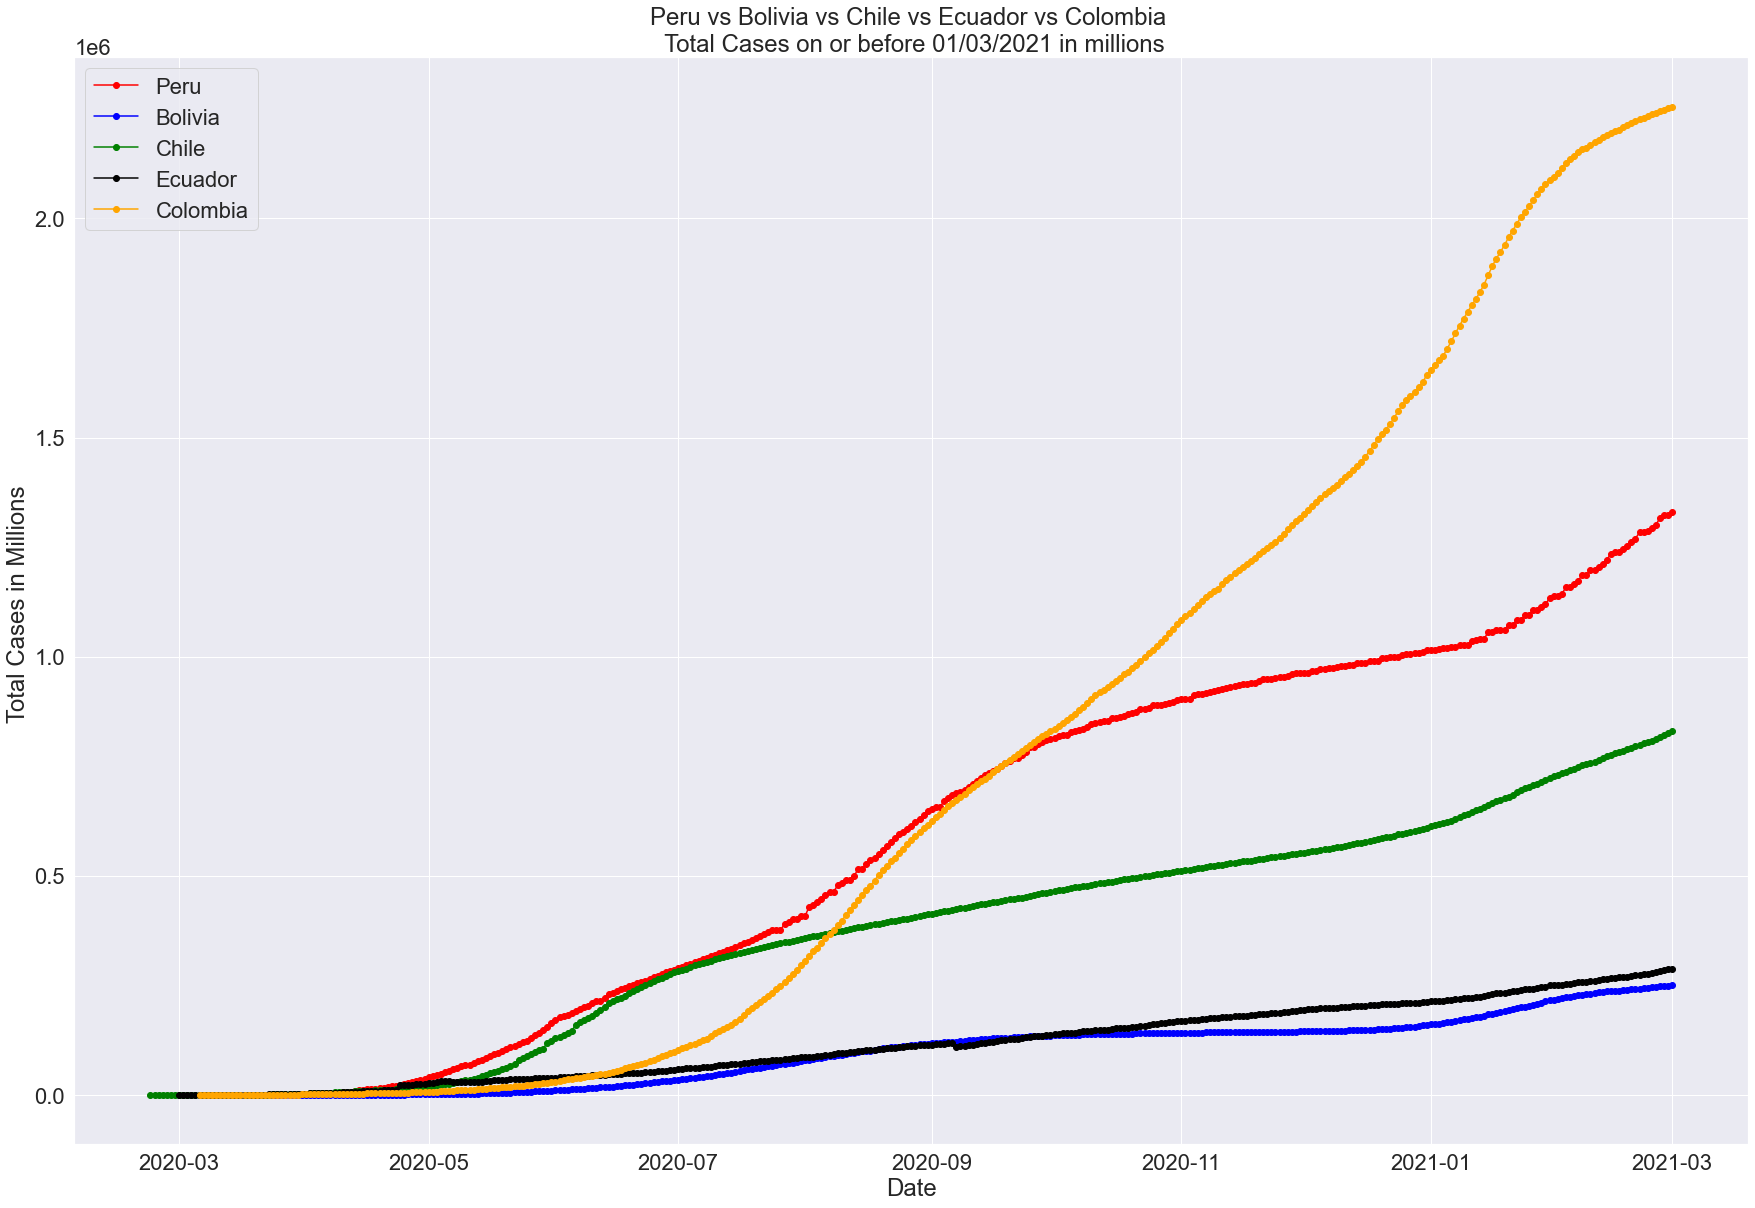

In [35]:
sns.set_style('darkgrid')
sns.set(font_scale=2)
fig, ax = plt.subplots( figsize=(30, 20))

d2021 = datetime(2021, 3, 1)

col2021 = colombia.loc[colombia['date'] <= d2021]
bol2021 = bolivia.loc[bolivia['date'] <= d2021]
bra2021 = brazil.loc[brazil['date'] <= d2021]
chil2021 = chile.loc[chile['date'] <= d2021]
ecu2021 = ecuador.loc[ecuador['date'] <= d2021]
peru2021 = true_peru.loc[true_peru['date'] <= d2021]
world2021 = world.loc[world['date'] <= d2021]

#ax[0].plot(peru2021.index.values, peru2021['total_cases'], color='red', label = 'Peru', marker = "o")
#ax[1].plot(world2021.index.values, world2021['total_cases'], color='red', label = 'Peru', marker = "o")
ax.plot(peru2021.index.values, peru2021['total_cases'], color='red', label = 'Peru', marker = "o")
ax.plot(bol2021.index.values, bol2021['total_cases'], color='blue', label = 'Bolivia', marker = "o")
#ax.plot(bra2021.index.values, bra2021['total_cases'], color='yellow', label = 'Brazil', marker = "o")
ax.plot(chil2021.index.values, chil2021['total_cases'], color='green', label = 'Chile', marker = "o")
ax.plot(ecu2021.index.values, ecu2021['total_cases'], color='black', label = 'Ecuador', marker = "o")
ax.plot(col2021.index.values, col2021['total_cases'], color='orange', label = 'Colombia', marker = "o")


ax.set(xlabel='Date', ylabel='Total Cases in Millions ', title = 'Peru vs Bolivia vs Chile vs Ecuador vs Colombia \n Total Cases on or before 01/03/2021 in millions')
#ax[1].set(xlabel='Date', ylabel='Total Cases in tens of Millions ', title = 'World \n Total Cases on or before 01/01/2021 in tens of millions')
#plt.setp(ax[0].get_xticklabels(), rotation=45)
#plt.setp(ax[1].get_xticklabels(), rotation=45)

ax.legend()

plt.show()
